**Machine Learning Based Methods for outlier detection**

1. Isolation Forest
2. Local Outlier Factor
3. k-Nearest Neighbors k-NN
4. One-Class Support Vector Machine
5. Auto Encoders


**1.Isolation Forest**
Isolation Forest is an algorithm specifically designed to detect outliers by isolating observations in the dataset. 
It's an unsupervised learning algorithm that identifies anomaly by isolating outliers in the data.

Isolation Forest is based on the Decision Tree algorithm. 
It works by randomly selecting a feature and splitting values to isolate each point, building a tree structure. The more isolated a point, the more likely it is to be an outlier.




Predictions: [ 1  1  1  1  1 -1  1  1  1]
Outliers detected: [[100]]


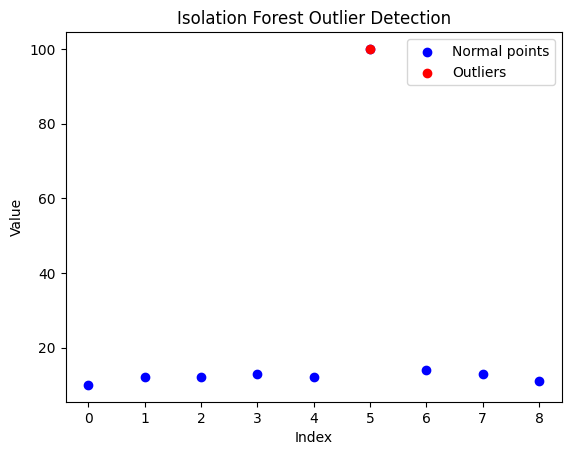

In [9]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Sample data (with an outlier at 100)
data = np.array([10, 12, 12, 13, 12, 100, 14, 13, 11]).reshape(-1, 1)

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)

# Fit the model on the data
model.fit(data)

# Predict the outliers (-1 indicates an outlier, 1 indicates a normal point)
predictions = model.predict(data)

# Print the predictions
print(f"Predictions: {predictions}")
# Outliers are marked with -1, normal points with 1
outliers = data[predictions == -1]
print(f"Outliers detected: {outliers}")

# Visualize the data with the outliers marked
plt.scatter(range(len(data)), data, color='blue', label='Normal points')
plt.scatter(np.where(predictions == -1), outliers, color='red', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Isolation Forest Outlier Detection')
plt.legend()
plt.show()


**Advantages**

1. Works well with high-dimensional data.
2. Scalable: Can handle large datasets efficiently.
3. No assumptions about the data distribution (e.g., does not assume a normal distribution).

**Use Cases for Isolation Forest:**
    
1. Fraud detection: Detecting unusual transactions in financial data.
2. Anomaly detection in sensor data: Identifying faulty sensor readings.
3. Manufacturing quality control: Detecting abnormal readings in production processes.

**2.Local Outlier Factor**

LOF identifies outliers by measuring the local density deviation of a data point with respect to its neighbors. It compares the density of a point with the density of its neighbors, flagging points that have a much lower density.

**Local Density:** For each data point, LOF measures the "local density" (how many data points surround it) by using the k-nearest neighbors. The density is computed by the ratio of the distance to the k-th nearest neighbor.

**Reachability Distance:** The reachability distance between two points is calculated as the maximum of the actual distance between the points and the distance from the first point to its k-th nearest neighbor.

**LOF Score:** LOF calculates a score for each data point based on its relative density compared to its neighbors. Points with a LOF score greater than 1 are considered outliers.

LOF > 1: outlier.
LOF = 1: The point is not an outlier (its density is similar to that of its neighbors)
LOF < 1: The point is in a dense region, not an outlier




predictions: [ 1  1  1  1  1 -1  1  1  1]
Outliers detected: [[100]]


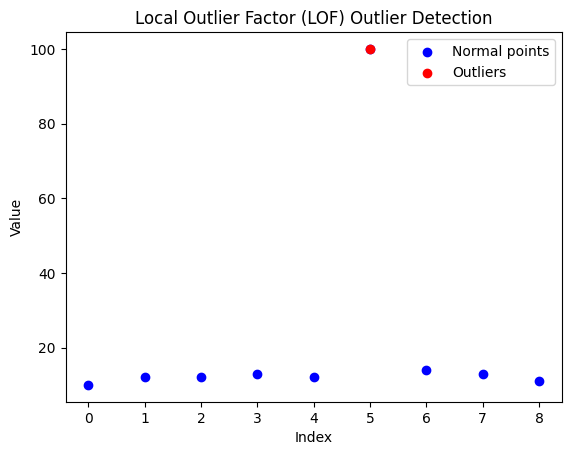

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


# Sample data with an outlier
data = np.array([10, 12, 12, 13, 12, 100, 14, 13, 11]).reshape(-1, 1)

# Initialize the LOF model with 2 neighbors (k=2) and contamination=0.1
# n_neighbors=3 This means we will be looking at the two nearest neighbors to calculate the local density of each point.
# contamination=0.1 specifies that we expect about 10% of the data to be outliers
lof = LocalOutlierFactor(n_neighbors=3, contamination=0.1)

# Fit the model and predict the outliers
predictions = lof.fit_predict(data)
print(f"predictions: {predictions}")
# LOF assigns -1 to outliers and 1 to normal points
outliers = data[predictions == -1]
print(f"Outliers detected: {outliers}")

# Visualize the data with the outliers marked
plt.scatter(range(len(data)), data, color='blue', label='Normal points')
plt.scatter(np.where(predictions == -1), outliers, color='red', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Local Outlier Factor (LOF) Outlier Detection')
plt.legend()
plt.show()


**Advantages of LOF:**

**Local detection:** LOF is excellent at detecting outliers in datasets with varying densities. For example, it works well when the data is clustered in some regions and sparse in others.

**Non-parametric:** LOF does not assume any specific distribution of the data, so it is useful for datasets that may not follow traditional distributions (e.g., Gaussian).

**Scalability:** While it can handle medium-sized datasets efficiently, LOF might struggle with very large datasets since it requires calculating distances for each point.

**Use Cases for LOF:**
    
**Fraud detection:** Identifying unusual transactions in financial datasets that might indicate fraudulent activities.

**Anomaly detection in sensor data:** Detecting abnormal sensor readings in industrial equipment or IoT devices.

**Image processing:** Finding defective or abnormal items in images or video frames, such as in quality control processes.

**3.k-Nearest Neighbors k-NN**

In this approach, the idea is that an outlier will typically have fewer close neighbors than a normal data point, meaning it is far from most other data points.

The method works by calculating the distance between a data point and its k nearest neighbors. Outliers are typically identified as points that are far away from their neighbors, meaning the distance to the nearest neighbor is higher than the threshold.


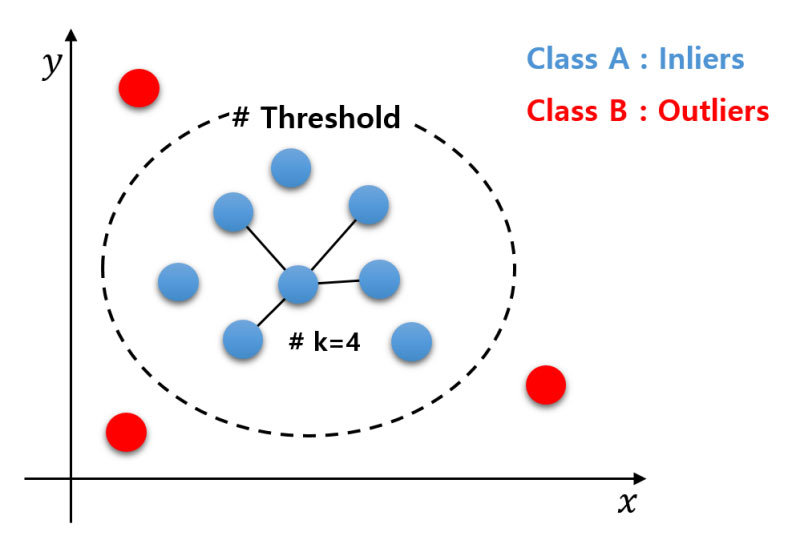


**How k-NN Outlier Detection Works:**

**Distance Calculation:** The distance to the k-nearest neighbors is calculated for each data point.

**Outlier Definition:** A point is considered an outlier if the distance to its k-th nearest neighbor is greater than a predefined threshold. Alternatively, outliers can be defined as points that are farthest from the majority of other points in the dataset.

**k value:** The choice of k can significantly influence the detection of outliers. A small k might make the method too sensitive, while a large k might miss local outliers.

outlier: [[50]]
Outliers detected: [[50.]]


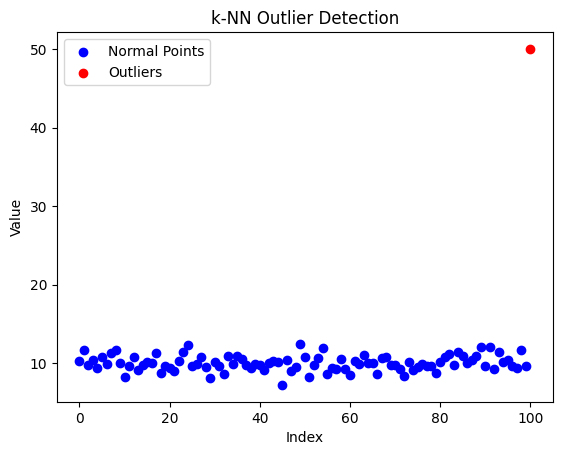

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Generating sample data with one outlier
normal_data = np.random.normal(loc=10, scale=1, size=(100, 1))  # Normal data points centered around 10

outlier = np.array([[50]])  # Outlier value far from the normal data points
print(f"outlier: {outlier}")
# Combine normal data and outlier
data = np.vstack([normal_data, outlier])
# Initialize the NearestNeighbors model
k = 5  # Number of neighbors to consider for k-NN
nn = NearestNeighbors(n_neighbors=k)

# Fit the model and calculate the distances
nn.fit(data)

# Get the distances to the k-th nearest neighbors for each data point
distances, indices = nn.kneighbors(data)

# The outliers will have higher distances to their k-th nearest neighbors
# We will consider points with a distance greater than a threshold as outliers

# Set a threshold for outlier detection (e.g., 3 standard deviations of the distances)
threshold = np.mean(distances[:, -1]) + 3 * np.std(distances[:, -1])

# Identify outliers based on the threshold
outliers = data[distances[:, -1] > threshold]
normal_points = data[distances[:, -1] <= threshold]

# Print the detected outliers
print(f"Outliers detected: {outliers}")

# Scatter plot to visualize the results
plt.scatter(np.arange(len(normal_points)), normal_points, color='blue', label='Normal Points')
plt.scatter(np.arange(len(normal_points), len(normal_points) + len(outliers)), outliers, color='red', label='Outliers')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('k-NN Outlier Detection')
plt.legend()
plt.show()

**Disadvantages:**

**Computational Complexity:** For large datasets, calculating distances between all points can be computationally expensive.

**Choice of k:** The performance can be sensitive to the choice of k. If k is too small, the method may falsely flag too many points as outliers; if k is too large, it might miss detecting real outliers


The k-NN algorithm is a simple but effective method for detecting outliers by comparing distances to nearest neighbors. By adjusting the number of neighbors (k) and setting an appropriate threshold for outlier detection, you can fine-tune the algorithm to work for different datasets. This method is particularly useful when the dataset has local variations or when the outliers are far from the majority of the data.

**4. One-Class Support Vector Machine**

One-Class Support Vector Machine (One-Class SVM) is an anomaly detection algorithm used to detect outliers or anomalies in a dataset where the majority of data points belong to one class. It is particularly useful when dealing with unbalanced datasets or when only normal data is available for training.

**Data Representation:**
One-Class SVM operates on a dataset that typically consists of normal data points only, without labeled anomalies. The goal is to build a model that learns the distribution of normal data and identifies instances that deviate significantly from this distribution as anomalies.

**Kernel Trick:**
One-Class SVM uses a kernel function to map the input data into a higher-dimensional space where the data points are more separable. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.

**Hyperparameter Tuning:**
One of the key hyperparameters in One-Class SVM is the kernel parameter, which determines the type of kernel function used. Other hyperparameters include the regularization parameter (nu) and the kernel coefficient (gamma for RBF kernel).
Hyperparameter tuning is often performed using techniques like grid search or cross-validation to find the optimal values that maximize model performance.

**Hyperplane**
The model learns a hyperplane that encapsulates the majority of the data points, and anything outside this boundary is considered an outlier or anomaly.


**Key Steps:**

**Training:** The One-Class SVM is trained on the "normal" data (which may have multiple features), and it learns a boundary that attempts to include most of the data within it.

**Outlier Prediction:** After the model is trained, any new data point (test point) that lies outside the learned boundary is classified as an outlier or anomaly.


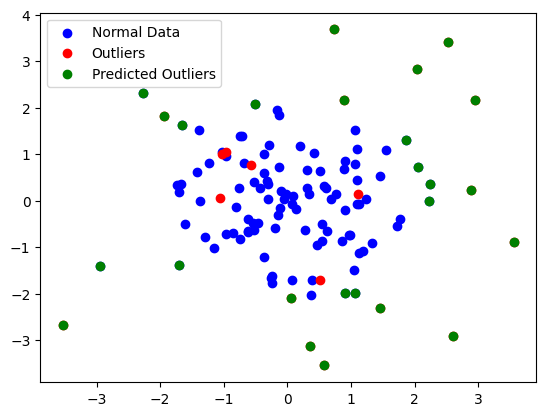

In [40]:
from sklearn.svm import OneClassSVM
import numpy as np
import matplotlib.pyplot as plt

# Example Data
X = np.random.randn(100, 2)  # 100 normal points (2D)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))  # 20 outliers

# Combine the normal points and outliers
X_combined = np.vstack([X, X_outliers])

# Create and train One-Class SVM model
model = OneClassSVM(kernel='rbf', nu=0.1, gamma=0.1)
model.fit(X)

# Predict outliers on the combined data
y_pred = model.predict(X_combined)

# Visualize the result
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Normal Data')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='red', label='Outliers')
plt.scatter(X_combined[y_pred == -1, 0], X_combined[y_pred == -1, 1], color='green', label='Predicted Outliers')
plt.legend()
plt.show()


**Advantages**

Works well when you only have data from one class and want to identify unusual patterns.

Suitable for high-dimensional data, thanks to the kernel trick.

Can be applied in various domains such as fraud detection, network intrusion detection, and image anomaly detection.


**Disadvantages**

Requires careful tuning of the parameters (nu, gamma, and kernel).

Can be computationally expensive for large datasets, especially with high-dimensional data.

Performance heavily depends on the choice of kernel and the distribution of the data.


OCSVM is a powerful tool for outlier detection, 
particularly in scenarios with 

imbalanced datasets, 

high-dimensional data, 

non-linear relationships, and 

robustness to noise.

**5. Auto Encoders - Outlier detction technique**

Autoencoders are a type of artificial neural network that are commonly used for dimensionality reduction and anomaly detection (outlier detection). 

An autoencoder works by encoding input data into a lower-dimensional representation and then reconstructing the input from 
this compressed version. 

The key idea behind using autoencoders for outlier detection is that the model learns to reconstruct
the "normal" data well, but it will struggle to reconstruct anomalies (outliers) accurately.

**How Autoencoders Work for Outlier Detection:**

**Encoder:** The encoder compresses the input data into a smaller latent-space representation.

**Decoder:** The decoder reconstructs the input data from the compressed representation.

**Reconstruction Error:** The reconstruction error is the difference between the original input and the reconstructed output. For normal data, this error will be small since the autoencoder has learned the patterns in the data. However, for outliers (which are different from the normal data), the error will be large.


**Steps for Outlier Detection using Autoencoders:**

Train the Autoencoder on normal data (without outliers).

Calculate the Reconstruction Error for all data points.

Set a Threshold: Any data point with a reconstruction error above a certain threshold is classified as an outlier.

Classify Points: Points with a reconstruction error higher than the threshold are outliers.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [46]:
# Generate normal data (100 data points from a normal distribution)
X_normal = np.random.randn(100, 2)

# Generate outlier data (20 data points from a uniform distribution)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Combine the normal data with outliers
X_combined = np.vstack([X_normal, X_outliers])

# Normalize the data to scale it to [0, 1]
scaler = MinMaxScaler()
X_combined = scaler.fit_transform(X_combined)


In [47]:
# Define the autoencoder architecture
input_dim = X_combined.shape[1]  # Number of features (2 in this case)
encoding_dim = 1  # Reduced dimension after encoding (compress data)

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(), loss='mse')


In [48]:
# Train the autoencoder on normal data
autoencoder.fit(X_normal, X_normal, epochs=50, batch_size=10, verbose=0)


In [49]:
# Predict the reconstruction of the combined dataset
X_reconstructed = autoencoder.predict(X_combined)

# Calculate the reconstruction error (Mean Squared Error)
reconstruction_error = np.mean(np.square(X_combined - X_reconstructed), axis=1)


4/4 [==============================] - 0s 2ms/step


In [50]:
# Set a threshold for outlier detection (e.g., 95th percentile of the reconstruction error)
threshold = np.percentile(reconstruction_error, 95)

# Classify outliers (1 for normal, -1 for outlier)
y_pred = np.where(reconstruction_error > threshold, -1, 1)


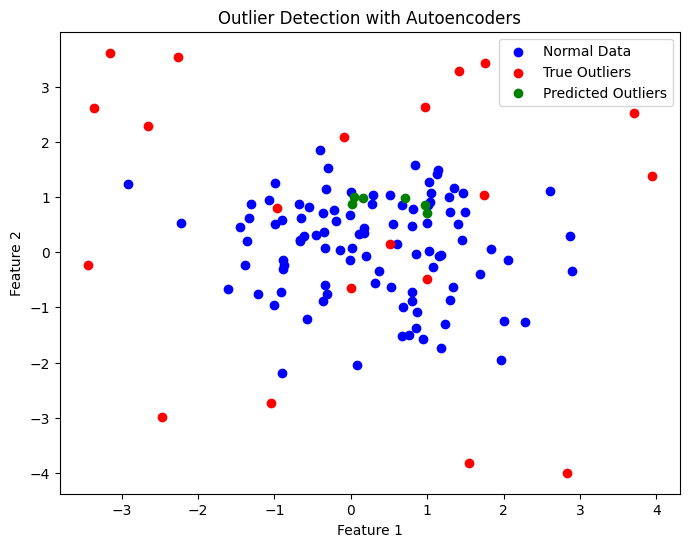

In [51]:
# Plot normal data and outliers
plt.figure(figsize=(8, 6))

# Normal data points
plt.scatter(X_normal[:, 0], X_normal[:, 1], color='blue', label='Normal Data')

# Outlier data points
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='red', label='True Outliers')

# Predicted outliers
plt.scatter(X_combined[y_pred == -1, 0], X_combined[y_pred == -1, 1], color='green', label='Predicted Outliers')

# Labels and legend
plt.title("Outlier Detection with Autoencoders")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Show plot
plt.show()


**Advantages of Using Autoencoders for Outlier Detection:**

**High-dimensional Data:** Autoencoders can handle high-dimensional data effectively, whereas traditional statistical methods (like Z-score) might struggle.

**No Need for Labeled Data:** They can be used in unsupervised settings where only normal data is available.

**Non-linear Relationships:** Unlike methods like k-NN, autoencoders can capture non-linear relationships in the data.

Autoencoders are a powerful tool for anomaly detection, especially when you have a large amount of normal data but few or no labeled outliers. By training the autoencoder on only the normal data, you can use reconstruction error as a way to detect points that don't fit the normal pattern. This method is flexible and can be applied to a variety of domains, including fraud detection, network intrusion detection, and quality control in manufacturing.